In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__
fol_data = '../offline_data'

In [2]:
data = pd.Series(np.arange(10)**2)
data

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int32

In [3]:
data.values

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [4]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [5]:
data[3]

9

In [6]:
data = pd.Series([1, 2, 3, 4],index=['a','b','c','d'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [7]:
print(data[0])
print(data['a'])

1
1


In [8]:
print(data['a':'c'])

a    1
b    2
c    3
dtype: int64


In [9]:
data1 = pd.Series('repeat',index=np.arange(5))
data1

0    repeat
1    repeat
2    repeat
3    repeat
4    repeat
dtype: object

In [10]:
data2 = pd.Series([0,5,3,1,6],index=np.arange(5))
df = pd.DataFrame({'rep':data1,'unknown':data2})
df

,rep,unknown
0,repeat,0
1,repeat,5
2,repeat,3
3,repeat,1
4,repeat,6


In [11]:
df['unknown']

0    0
1    5
2    3
3    1
4    6
Name: unknown, dtype: int64

In [12]:
csv = fol_data + '/uscities.csv'
df = pd.read_csv(csv)
df.keys()

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

<ipython-input-13-33f47e4477fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][I] -= 360


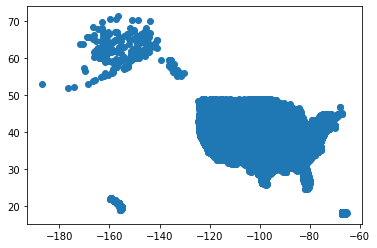

In [13]:
I = df['lng'] > 0
df['lng'][I] -= 360
plt.scatter(df['lng'],df['lat'])

In [14]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [15]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [16]:
indA ^ indB # symmetric difference (wow, what's not share between, oppposite of intersection)

Int64Index([1, 2, 9, 11], dtype='int64')

In [17]:
data = pd.Series([1, 2, 3, 4],index=['a','b','c','d'])
print(data['b'])
'a' in data

2


True

In [18]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [19]:
list(data.items())

[('a', 1), ('b', 2), ('c', 3), ('d', 4)]

In [20]:
want = ['a','c']
data[want]

a    1
c    3
dtype: int64

In [21]:
data.loc['a'] # Always explicit indexing
#data.loc[0] <- this won't work!

1

In [22]:
data.iloc[:2] #Implicit indexing always

a    1
b    2
dtype: int64

In [23]:
csv = fol_data + '/uscities.csv'
df = pd.read_csv(csv)
print([np.mean(df.lat), np.mean(df.lng)])



[38.61399456207233, -92.9723933587412]


In [24]:
df.iloc[:3,:2].head() # Slicing in both dimensions! Using implicit

,city,city_ascii
0,New York,New York
1,Los Angeles,Los Angeles
2,Chicago,Chicago


In [25]:
#plt.plot(df.population)
mask_big = df.population > 5e6
mask_big
df['city'][mask_big]

0        New York
1     Los Angeles
2         Chicago
3           Miami
4          Dallas
5    Philadelphia
6         Houston
7         Atlanta
8      Washington
Name: city, dtype: object

In [26]:
dfb = df[mask_big]
dfb.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


(array([1.5589e+04, 6.6690e+03, 2.4940e+03, 1.2750e+03, 7.9100e+02,
        4.9000e+02, 3.1500e+02, 2.1600e+02, 1.4800e+02, 6.8000e+01,
        6.6000e+01, 4.3000e+01, 4.4000e+01, 2.9000e+01, 1.7000e+01,
        1.6000e+01, 1.3000e+01, 6.0000e+00, 1.0000e+01, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

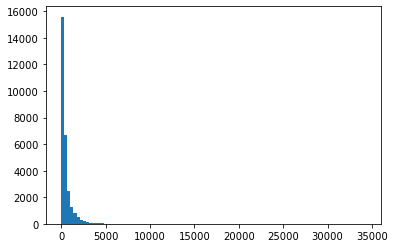

In [27]:
plt.hist(df.density,100)

In [28]:
df.describe()

,county_fips,lat,lng,population,density,ranking,id
count,28338.000000,28338.000000,28338.000000,2.833800e+04,28338.000000,28338.000000,2.833800e+04
mean,29834.354224,38.613995,-92.972393,1.426071e+04,515.410615,2.945938,1.838216e+09
std,15845.095836,5.870832,15.596099,1.898112e+05,786.011155,0.233816,1.936183e+07
min,1001.000000,17.955900,-176.629500,1.000000e+00,0.000000,1.000000,1.630024e+09
25%,17179.000000,35.126875,-98.193975,3.300000e+02,117.000000,3.000000,1.840008e+09
50%,29205.000000,39.314800,-90.250100,1.089000e+03,297.000000,3.000000,1.840015e+09
75%,42043.000000,41.743725,-81.933650,4.485500e+03,603.000000,3.000000,1.840022e+09
max,72153.000000,71.272800,173.123000,1.871322e+07,34277.000000,3.000000,1.840153e+09


In [29]:
rng = np.random.RandomState(42)
ser = pd.Series(np.random.randint(0,10,4))
ser

0    0
1    6
2    6
3    2
dtype: int32

In [30]:
df = pd.DataFrame(np.random.randint(0,10,(3,4)),columns=['a','b','c','d'])
df

,a,b,c,d
0,0,6,4,5
1,5,8,8,4
2,2,6,8,9


In [31]:
np.exp(df)

,a,b,c,d
0,1.000000,403.428793,54.598150,148.413159
1,148.413159,2980.957987,2980.957987,54.598150
2,7.389056,403.428793,2980.957987,8103.083928


In [32]:
df.iloc[0,0] = np.nan
np.exp(df)

,a,b,c,d
0,NaN,403.428793,54.598150,148.413159
1,148.413159,2980.957987,2980.957987,54.598150
2,7.389056,403.428793,2980.957987,8103.083928


In [33]:
# pandas automatically syncs up on index
area = pd.Series({'a':123,'b':345,'c':1,'d':324}, name='area')
pop = pd.Series({'b':3.4,'d':7.1})
pop / area

a         NaN
b    0.009855
c         NaN
d    0.021914
dtype: float64

In [34]:
list('ABC')

['A', 'B', 'C']

In [35]:
A = pd.DataFrame(np.random.randint(0,100,(3,3)),columns=list('ABC'))
B = pd.DataFrame(np.random.randint(0,10,(4,4)),columns=list('ECDA'))
A+B

,A,B,C,D,E
0,16.0,NaN,43.0,NaN,NaN
1,18.0,NaN,12.0,NaN,NaN
2,41.0,NaN,8.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


In [36]:
B - B.iloc[0]

,E,C,D,A
0,0,0,0,0
1,-1,5,2,-4
2,-4,0,-2,-1
3,-4,1,-7,-2


In [37]:
B.subtract(B.iloc[:,2],axis=0)

,E,C,D,A
0,-1,-6,0,-3
1,-4,-3,0,-9
2,-3,-4,0,-2
3,2,2,0,2


In [38]:
a = np.array([1,3,np.nan,4])
print(a+2)
print(a.dtype)

[ 3.  5. nan  6.]
float64


**Note! NaN is solely a floating type variable** 

In [39]:
A = pd.DataFrame(np.random.randint(0,100,(3,3)),columns=list('ABC'))
B = pd.DataFrame(np.random.randint(0,10,(4,4)),columns=list('ECDA'))
C = A+B
D = C
D[C.isnull()] = -999
D

,A,B,C,D,E
0,66.0,-999.0,34.0,-999.0,-999.0
1,94.0,-999.0,63.0,-999.0,-999.0
2,1.0,-999.0,40.0,-999.0,-999.0
3,-999.0,-999.0,-999.0,-999.0,-999.0


In [40]:
C = A + B
C.dropna(axis='columns',how='all')

,A,C
0,66.0,34.0
1,94.0,63.0
2,1.0,40.0
3,NaN,NaN


In [41]:
C.dropna(axis='rows',how='all')

,A,B,C,D,E
0,66.0,NaN,34.0,NaN,NaN
1,94.0,NaN,63.0,NaN,NaN
2,1.0,NaN,40.0,NaN,NaN


In [42]:
C.dropna()

,A,B,C,D,E


In [43]:
C.fillna(0)

,A,B,C,D,E
0,66.0,0.0,34.0,0.0,0.0
1,94.0,0.0,63.0,0.0,0.0
2,1.0,0.0,40.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0


In [44]:
C.fillna(method='ffill',axis='columns')

,A,B,C,D,E
0,66.0,66.0,34.0,34.0,34.0
1,94.0,94.0,63.0,63.0,63.0
2,1.0,1.0,40.0,40.0,40.0
3,NaN,NaN,NaN,NaN,NaN


In [45]:
C.fillna(method='bfill',axis='columns')

,A,B,C,D,E
0,66.0,34.0,34.0,NaN,NaN
1,94.0,63.0,63.0,NaN,NaN
2,1.0,40.0,40.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


Hierachical Indexing

In [52]:
index = [('Ca',2000),('Ca',2010),('NY',2000),('NY',2010),('TX',2000),('TX',2010)]

In [54]:
pops = [1321,12312,435,123,12556,12312]
pop = pd.Series(pops,index=index)
pop

(Ca, 2000)     1321
(Ca, 2010)    12312
(NY, 2000)      435
(NY, 2010)      123
(TX, 2000)    12556
(TX, 2010)    12312
dtype: int64

In [56]:
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop

Ca  2000     1321
    2010    12312
NY  2000      435
    2010      123
TX  2000    12556
    2010    12312
dtype: int64

In [57]:
pop[:,2010]


Ca    12312
NY      123
TX    12312
dtype: int64

In [59]:
df = pop.unstack()
df

,2000,2010
Ca,1321,12312
NY,435,123
TX,12556,12312


In [62]:
pop.unstack(level=0)

,Ca,NY,TX
2000,1321,435,12556
2010,12312,123,12312


In [60]:
pd.MultiIndex.from_product([['a','b'],[1,2]])


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [81]:
fname = '../PythonDataScienceHandbook/notebooks/data/births.csv'
df = pd.read_csv(fname)
df = df.set_index(['year','month','gender'])
df

day  births
year month gender             
1969 1     F       1.0    4046
           M       1.0    4440
           F       2.0    4454
           M       2.0    4548
           F       3.0    4548
...                ...     ...
2008 10    M       NaN  183219
     11    F       NaN  158939
           M       NaN  165468
     12    F       NaN  173215
           M       NaN  181235

[15547 rows x 2 columns]

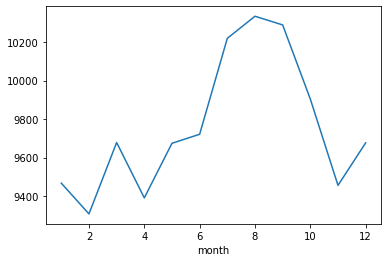

In [82]:
df_month = df.mean(level='month')
df_month['births'].plot()

In [84]:
df.sum(level='gender')

,day,births
gender,,
F,134012.0,74035823
M,133727.0,77738555
